In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sentence_labels_MSNBC.csv")
df.head()

,Unnamed: 0,subject,sentence,output
0,0,Kobe,"And if there was an example of that, it was Ko...",NEUTRAL
1,1,Kobe,When we look at Kobe Bryant and his relationsh...,NEUTRAL
2,2,Kobe,I`m Kobe Bryant.,NEUTRAL
3,3,Kobe,How -- it`s not just the fame of Kobe Bryant t...,POSITIVE
4,4,Kobe,How was the sensitivity level to you that Kobe...,NEUTRAL


In [4]:
df = df.replace(['NEGATIVE','NEUTRAL','POSITIVE'],[-1,0,1])
#df = df.replace(['NEGATIVE','POSITIVE'],[-1,1])
df.output = pd.to_numeric(df.output, errors='coerce')
df = df.dropna()

In [5]:
gdf = df.groupby("subject").agg({'sentence':'count','output' : 'mean'}).sort_values('sentence', ascending=False)
gdf.head()

,sentence,output
subject,,
Trump,169,-0.822485
Iran,86,-0.930233
Democrats,57,-0.508772
Republicans,54,-0.777778
Senate,39,-0.641026


<BarContainer object of 10 artists>

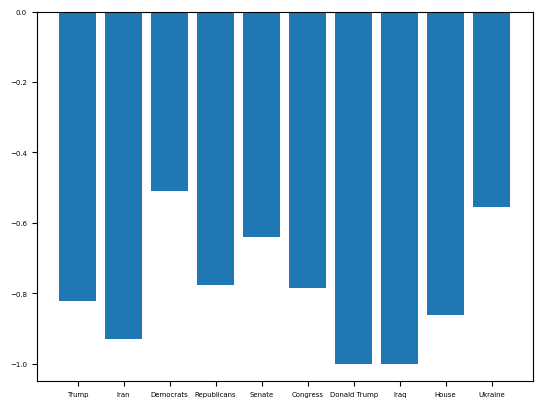

In [6]:
plt.rcParams['font.size'] = 5
pltdf = gdf
plt.bar(pltdf.index[0:10], pltdf.output[0:10])

<BarContainer object of 6 artists>

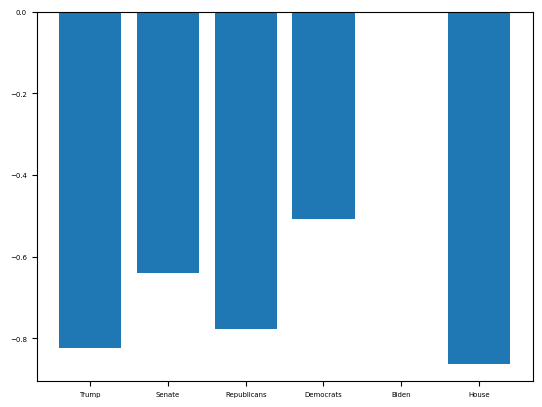

In [8]:
plt.rcParams['font.size'] = 5
pltdf = gdf.loc[['Trump','Senate','Republicans','Democrats','Biden','House'],:]
plt.bar(pltdf.index, pltdf.output)